In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from wordcloud import WordCloud, STOPWORDS
import plotly_express as px


In [2]:
df = pd.read_csv(r'D:\NLP\dataset\sentiment-emotion-labelled_Dell_tweets.csv')
df

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...,...,...,...
24965,24965,2022-01-01 02:02:04+00:00,1477097760931336198,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,24966,2022-01-01 01:57:34+00:00,1477096631300415496,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,24967,2022-01-01 01:36:36+00:00,1477091355629432833,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,24968,2022-01-01 01:31:30+00:00,1477090070830141442,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [3]:
df.isnull().sum()

Unnamed: 0         0
Datetime           0
Tweet Id           0
Text               0
Username           0
sentiment          0
sentiment_score    0
emotion            0
emotion_score      0
dtype: int64

In [4]:
df.drop(labels=['Unnamed: 0','Datetime','Tweet Id'],inplace=True,axis=1)
df

,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...
24965,@ElDarkAngel2 @GamersNexus @Dell I wouldn't ev...,Eodart,negative,0.682981,anger,0.906309
24966,@kite_real @GamersNexus @Dell I didn't really ...,Eodart,positive,0.743940,joy,0.951701
24967,Hey @JoshTheFixer here it is....27 4K UHD USB-...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,@bravadogaming @thewolfpena @Alienware @intel ...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [5]:
df['Text'][3]

'@dell your customer service is horrible especially agent syedfaisal who has made this experience of purchasing a new computer downright awful and I’ll reconsider ever buying a Dell in the future @DellTech'

### removing @ tags from text column

In [6]:
def remove_mentions(sentence):
    words = sentence.split()
    filtered_words = [word for word in words if not word.startswith("@")]
    filtered_sentence = " ".join(filtered_words)
    return filtered_sentence

df['Text'] = df['Text'].apply(remove_mentions)
df

,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,#WhatIf QWERTY were modified for programmers s...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,She's getting a new #laptop when the one she h...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,"As celebrates its 40th anniversary, Bob Faletr...",jfollett,positive,0.763791,joy,0.960347
3,your customer service is horrible especially a...,daveccarr,negative,0.954023,anger,0.983203
4,give the man what he paid for!,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...
24965,I wouldn't even know what to blow my whistle a...,Eodart,negative,0.682981,anger,0.906309
24966,"I didn't really leave for the ethical reasons,...",Eodart,positive,0.743940,joy,0.951701
24967,Hey here it is....27 4K UHD USB-C by https://t...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,Imma be honest I have never watched Dragon Bal...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [7]:
(df.duplicated() == True).value_counts()

False    24702
True       268
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)
df

,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,#WhatIf QWERTY were modified for programmers s...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,She's getting a new #laptop when the one she h...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,"As celebrates its 40th anniversary, Bob Faletr...",jfollett,positive,0.763791,joy,0.960347
3,your customer service is horrible especially a...,daveccarr,negative,0.954023,anger,0.983203
4,give the man what he paid for!,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...
24965,I wouldn't even know what to blow my whistle a...,Eodart,negative,0.682981,anger,0.906309
24966,"I didn't really leave for the ethical reasons,...",Eodart,positive,0.743940,joy,0.951701
24967,Hey here it is....27 4K UHD USB-C by https://t...,Corleone250,neutral,0.654463,anticipation,0.471185
24968,Imma be honest I have never watched Dragon Bal...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


In [9]:
(df.duplicated() == True).value_counts()

False    24702
dtype: int64

In [10]:
import texthero as hero

In [11]:
df['Text'] = hero.clean(df['Text'])
df

c:\Users\nares\AppData\Local\Programs\Python\Python311\Lib\site-packages\texthero\preprocessing.py:46: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(r"^\d+\s|\s\d+\s|\s\d+$", " ")
c:\Users\nares\AppData\Local\Programs\Python\Python311\Lib\site-packages\texthero\preprocessing.py:81: FutureWarning: The default value of regex will change from True to False in a future version.
  return input.str.replace(pat, '')


,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,whatif qwerty modified programmers things like...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,getting new laptop one one 2 3 years old tripl...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,celebrates 40th anniversary bob faletra spoke ...,jfollett,positive,0.763791,joy,0.960347
3,customer service horrible especially agent sye...,daveccarr,negative,0.954023,anger,0.983203
4,give man paid,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...
24965,even know blow whistle people following gamers...,Eodart,negative,0.682981,anger,0.906309
24966,really leave ethical reasons personal however ...,Eodart,positive,0.743940,joy,0.951701
24967,hey 27 4k uhd usb c https co qrlobzjxoa,Corleone250,neutral,0.654463,anticipation,0.471185
24968,imma honest never watched dragon ball z imma t...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


### removing HTTPS links 

In [12]:
def remove_https(sentence):
    words = sentence.split()
    filtered_words = []
    skip_next = False
    for i, word in enumerate(words):
        if skip_next:
            skip_next = False
            continue
        if word == "https":
            break
        filtered_words.append(word)
        if word.startswith("https"):
            skip_next = True
    filtered_sentence = " ".join(filtered_words)
    return filtered_sentence

df['Text'] = df['Text'].apply(remove_https)

In [13]:
 
fig = px.sunburst(df, path=['sentiment', 'emotion'],width=1000,height=800,color='sentiment')
fig.show()

In [14]:
df['emotion'].unique()

array(['anticipation', 'joy', 'anger', 'sadness', 'fear', 'optimism',
       'disgust', 'surprise'], dtype=object)

In [15]:
fig = px.histogram(df['emotion'],title="Graphs of Emotions",x="emotion",height=500,color='emotion')
fig.show()

In [35]:
fig = px.histogram(df,x='sentiment',color='emotion',height=700,title="count of emotion caterized into sentiments")
fig.show()

In [45]:

fig = px.scatter(df.head(500),x='sentiment_score',y='emotion_score',color='sentiment',height=700,width=800)
fig.show()

In [50]:
fig = px.parallel_coordinates(df.head(200),color='emotion_score',
                              dimensions=['sentiment_score', 'emotion_score'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0.5,
                              height=800,width=900)
fig.show()

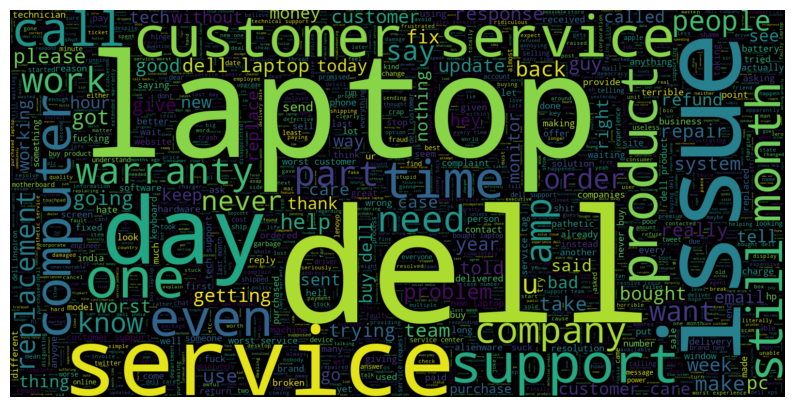

In [16]:
## word cloud of Tweets where emotion was ANGER---------
text = ' '.join([word for word in df['Text'][df['emotion'] == 'anger']])
wordcloud = WordCloud(max_words=2000, width=1600, height=800).generate(text)

mpl.figure(figsize=(10,10), facecolor='None')
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('off')
mpl.show()


In [17]:
# import cv2

# mask_file = cv2.imread("/kaggle/input/twitter-logo/6-2-twitter-png-image.png")
# word_cloud = WordCloud(background_color = 'white', 
#                        mask = mask_file,
#                        max_words = 200).generate(text)

# mpl.figure(figsize = (6, 6))
# mpl.imshow(word_cloud)
# mpl.axis("off")
# mpl.title('Most Prevalent Words')
# mpl.tight_layout()
 
# mpl.show()

### Tokenization

In [18]:
# import my_nltk
# my_nltk.download('punkt')

# def tokenization(txt):
#     words = nltk.word_tokenize(txt)

# df['Text'] = df['Text'].apply(tokenization)

### lemmitization on text column

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [20]:
##################### -- WRONG APPROCH --- ####################
# df['Text'] = lemmatizer.lemmatize(df['Text'])
# df

df['Text'] = df['Text'].apply(lambda x: lemmatizer.lemmatize(x))
df

,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,whatif qwerty modified programmers things like...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,getting new laptop one one 2 3 years old tripl...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,celebrates 40th anniversary bob faletra spoke ...,jfollett,positive,0.763791,joy,0.960347
3,customer service horrible especially agent sye...,daveccarr,negative,0.954023,anger,0.983203
4,give man paid,heycamella,neutral,0.529170,anger,0.776124
...,...,...,...,...,...,...
24965,even know blow whistle people following gamers...,Eodart,negative,0.682981,anger,0.906309
24966,really leave ethical reasons personal however ...,Eodart,positive,0.743940,joy,0.951701
24967,hey 27 4k uhd usb c,Corleone250,neutral,0.654463,anticipation,0.471185
24968,imma honest never watched dragon ball z imma t...,MrTwistyyy,neutral,0.794049,anticipation,0.747014


#### Example

In [21]:
text = "stopped buying windows laptops longtime ago"
text2 = lemmatizer.lemmatize(text)
print(text2)

stopped buying windows laptops longtime ago


### vecotrization

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

In [23]:
vectors = cv.fit_transform(df['Text']).toarray()

In [26]:
cv.get_feature_names_out()

array(['00', '000', '04', ..., 'youtube', 'yrs', 'zero'], dtype=object)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

c:\Users\nares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning:

invalid value encountered in matmul

